# Customer Purchase Behavior Analysis using Descriptive Statistics (Rishabh Kumar)


##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

  Provide a detailed report on the steps taken to handle missing values, including imputation methods used if applicable.
  Document the process of ensuring consistent data types for each variable, addressing any inconsistencies.

- **Summary of Basic Statistics**:

  Present calculated statistics such as mean, median, variance, and standard deviation for each relevant numerical variable.
  Include a concise table or summary showcasing these measures for easy reference.

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns

In [100]:
import scipy.stats as stats

In [101]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
filepath="/content/drive/MyDrive/AlmaBetter/Applied statistics project/Superstore Marketing Data.csv"
df=pd.read_csv(filepath)

In [103]:
df

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,########,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,########,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0


## Dataset Description

In [104]:
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [106]:
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [107]:
df.shape

(2240, 22)

In [108]:
print(df.apply(lambda col:col.unique()))

Id                     [1826, 1, 10476, 1386, 5371, 7348, 4073, 1991,...
Year_Birth             [1970, 1961, 1958, 1967, 1989, 1954, 1947, 197...
Education                     [Graduation, PhD, 2n Cycle, Master, Basic]
Marital_Status         [Divorced, Single, Married, Together, Widow, Y...
Income                 [84835.0, 57091.0, 67267.0, 32474.0, 21474.0, ...
Kidhome                                                        [0, 1, 2]
Teenhome                                                       [0, 1, 2]
Dt_Customer            [6/16/2014, 6/15/2014, 5/13/2014, ########, 3/...
Recency                [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
MntWines               [189, 464, 134, 10, 6, 336, 769, 78, 384, 450,...
MntFruits              [104, 5, 11, 0, 16, 130, 80, 26, 4, 82, 10, 6,...
MntMeatProducts        [379, 64, 59, 1, 24, 411, 252, 11, 102, 535, 6...
MntFishProducts        [111, 7, 15, 0, 11, 240, 21, 73, 80, 3, 2, 13,...
MntSweetProducts       [189, 0, 2, 32, 34, 98, 13, 

In [109]:
# Counting number of unwanated string in the column
dt_cust =  df['Dt_Customer'] == '########'
print(dt_cust.sum())

916


In [110]:
# replacing string with NA value to calculate amount of null values in the dataset
df['Dt_Customer'] = df['Dt_Customer'].replace('########', pd.NA)

In [111]:
df.isnull().sum()

,0
Id,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,916
Recency,0
MntWines,0


In [112]:
# Calculate the percentage of null values in each column
null_percentage = (df.isnull().sum() / len(df)) * 100

# Create a new DataFrame to display the null percentage for each column
null_percentage_df = pd.DataFrame({'NullPercentage': null_percentage})

# Display the null percentage for each column
null_percentage_df

,NullPercentage
Id,0.000000
Year_Birth,0.000000
Education,0.000000
Marital_Status,0.000000
Income,1.071429
Kidhome,0.000000
Teenhome,0.000000
Dt_Customer,40.892857
Recency,0.000000
MntWines,0.000000


In [113]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

We can see that the column 'Dt_Customer' has 40% missing data, which is the date has not been updated since year 2014, so I will drop the column as the major chunk of the data is missing.

In [114]:
df.drop(columns='Dt_Customer', inplace=True)

### Analyzing Income column

In [115]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


### We know that the 'Income' column has 1% missing value, so I'll be filling it with median value.

In [116]:
# Filling missing value with median value
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)


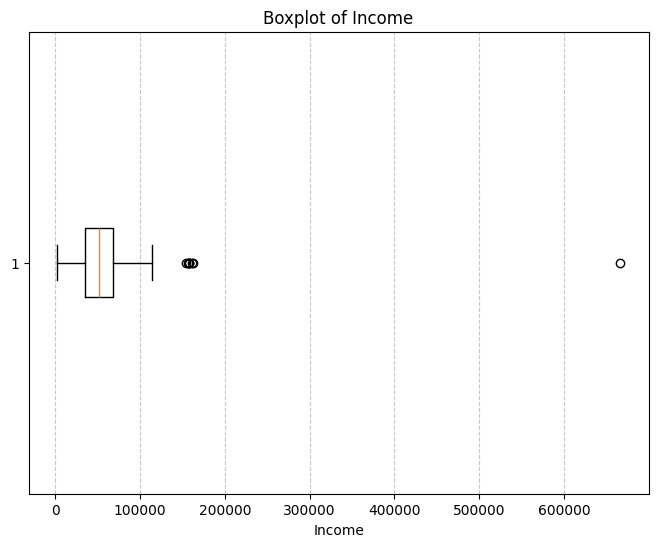

In [117]:
# Creating a boxplot for 'Income' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['Income'], vert=False)
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [118]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [119]:
# Removing extreme outliers (e.g., values beyond 3 standard deviations)
std_dev = df['Income'].std()
mean_income = df['Income'].mean()
df = df[(df['Income'] >= mean_income - 3 * std_dev) & (df['Income'] <= mean_income + 3 * std_dev)]

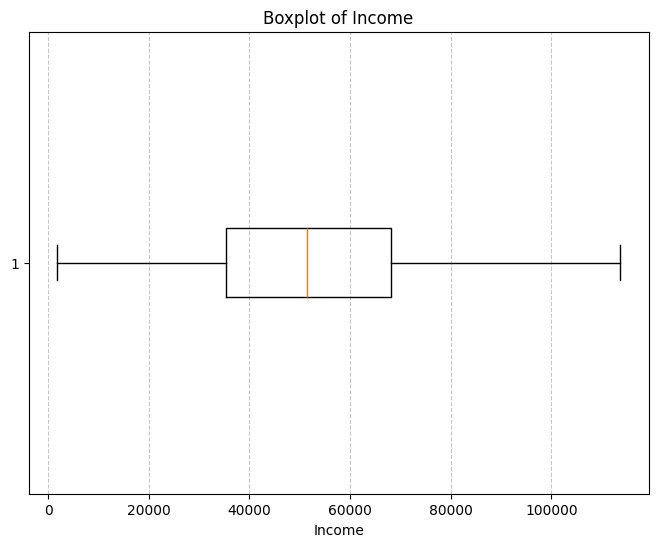

In [120]:
# Creating a boxplot for 'Income' column
plt.figure(figsize=(8, 6))
plt.boxplot(df['Income'], vert=False)
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [121]:
# Numerical variables - Calculating basic statistics (mean, median, variance, standard deviation)
numerical_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'NumWebVisitsMonth']
numerical_stats = df[numerical_cols].describe()

# Categorical variables - Calculating frequency counts or percentages
categorical_cols = ['Education', 'Marital_Status', 'Response', 'Complain']
categorical_stats = {}
for col in categorical_cols:
    categorical_stats[col] = df[col].value_counts(normalize=True) * 100  # Calculate percentages

# Displaying the calculated statistics
print("Basic Statistics for Numerical Variables:")
print(numerical_stats)

print("\nFrequency Counts or Percentages for Categorical Variables:")
for col, values in categorical_stats.items():
    print(f"\n{col}:")
    print(values)

Basic Statistics for Numerical Variables:
        Year_Birth         Income      Kidhome     Teenhome      Recency  \
count  2232.000000    2232.000000  2232.000000  2232.000000  2232.000000   
mean   1968.792563   51630.926971     0.444444     0.507168    49.111111   
std      11.990340   20601.679542     0.538567     0.544680    28.952893   
min    1893.000000    1730.000000     0.000000     0.000000     0.000000   
25%    1959.000000   35434.750000     0.000000     0.000000    24.000000   
50%    1970.000000   51381.500000     0.000000     0.000000    49.000000   
75%    1977.000000   68118.000000     1.000000     1.000000    74.000000   
max    1996.000000  113734.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2232.000000  2232.000000      2232.000000      2232.000000   
mean    304.930108    26.380376       165.319444        37.644713   
std     336.784950    39.821532       219.401447        54.689504 

### Visualizing the distribution of customer demographics including age, education, and marital status using histograms and bar charts

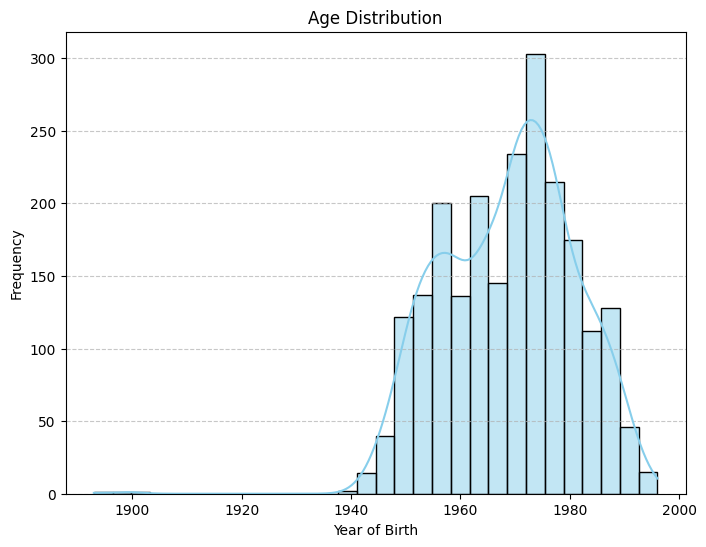

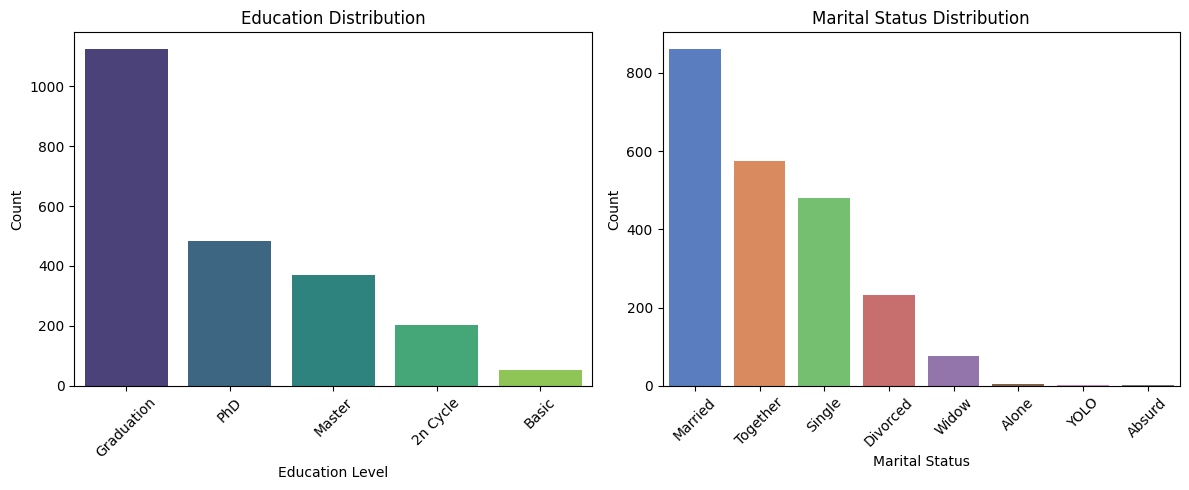

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of Age distribution using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(df['Year_Birth'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualization of Education and Marital Status using bar charts
plt.figure(figsize=(12, 5))

# Education distribution
plt.subplot(1, 2, 1)
education_counts = df['Education'].value_counts()
sns.barplot(
    x=education_counts.index,
    y=education_counts.values,
    hue=education_counts.index,  # Set `hue` to the x variable
    palette='viridis',
    dodge=False,  # Avoids separating bars when hue is set
    legend=False  # Suppress the legend
)
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Marital Status distribution
plt.subplot(1, 2, 2)
marital_counts = df['Marital_Status'].value_counts()
sns.barplot(
    x=marital_counts.index,
    y=marital_counts.values,
    hue=marital_counts.index,  # Set `hue` to the x variable
    palette='muted',
    dodge=False,  # Avoids separating bars when hue is set
    legend=False  # Suppress the legend
)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### **Analysis of Customer Demographics**

#### **Age Distribution (Histogram)**
- **Interpretation**:
  - The histogram represents the distribution of customer ages based on birth year.
  - Provides an overview of age spread and concentration within the dataset.

- **Observations**:
  - The distribution appears to be relatively normal or slightly right-skewed.
  - Dominant customer segments within specific age ranges might be identifiable.

#### **Education Distribution (Bar Chart)**
- **Interpretation**:
  - The bar chart displays the frequency of customers in different education levels.
  - Visualizes the relative proportions of customers across educational backgrounds.

- **Observations**:
  - Graduated custoers prevalent highest education levels among customers based on the tallest bars.
  - Shows the diversity in educational backgrounds within the customer base.

#### **Marital Status Distribution (Bar Chart)**
- **Interpretation**:
  - The bar chart illustrates the distribution of customers across various marital statuses.
  - Helps in understanding the prevalence of different marital statuses among customers.

- **Observations**:
  - Highlights the dominant marital status category among the customer base are the married people.
  - Provides insights into the relative distribution across different marital statuses.

### **Overall Insights and Actionable Points**
- **Understanding Customer Demographics**:
  - Helps in targeted marketing strategies based on age groups, educational backgrounds, and marital statuses.

- **Tailored Marketing and Offers**:
  - Customizing campaigns or products to match the preferences of specific demographic segments identified.



##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

  

In [123]:
# Extracting relevant numerical columns
numerical_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'NumWebVisitsMonth']

# Calculating statistics for numerical columns
numerical_stats = df[numerical_cols].agg(['mean', 'median', 'var', 'std']).transpose()

# Renaming index and formatting the table
numerical_stats.index.name = 'Numerical Variables'
numerical_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation']

# Displaying the summary table
numerical_stats

,Mean,Median,Variance,Standard Deviation
Numerical Variables,,,,
Year_Birth,1968.792563,1970.0,1.437682e+02,11.990340
Income,51630.926971,51381.5,4.244292e+08,20601.679542
Kidhome,0.444444,0.0,2.900543e-01,0.538567
Teenhome,0.507168,0.0,2.966765e-01,0.544680
Recency,49.111111,49.0,8.382700e+02,28.952893
MntWines,304.930108,176.0,1.134241e+05,336.784950
MntFruits,26.380376,8.0,1.585754e+03,39.821532
MntMeatProducts,165.319444,67.0,4.813699e+04,219.401447
MntFishProducts,37.644713,12.0,2.990942e+03,54.689504


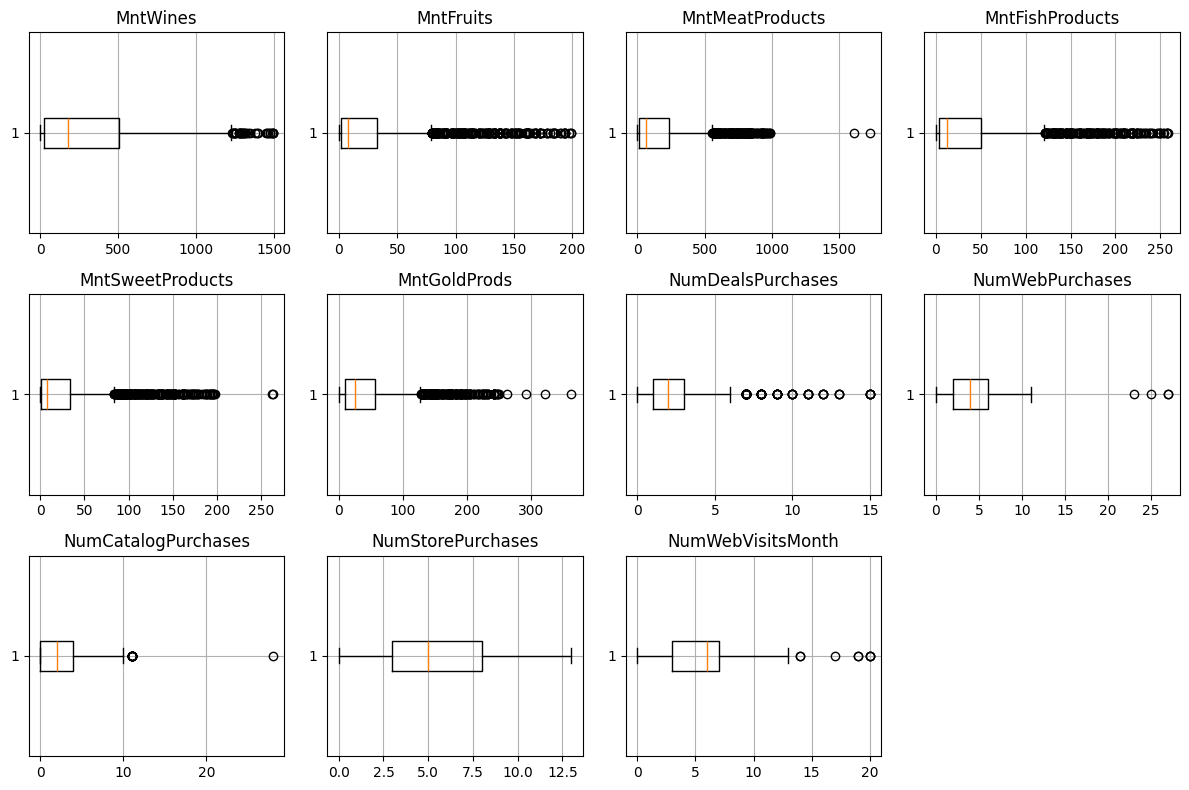

In [124]:
# List of columns
columns_to_visualize = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                        'NumWebVisitsMonth']

# Create boxplots for outlier detection
plt.figure(figsize=(12, 8))

# Loop through columns to create boxplots
for i, column in enumerate(columns_to_visualize, start=1):
    plt.subplot(3, 4, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

## **Handling Outliers**

In [125]:
# Making a copy of the DataFrame
df = df.copy()

for column in columns_to_visualize:
    # Ensure the column is of a compatible dtype (float)
    if not pd.api.types.is_float_dtype(df[column]):
        df[column] = df[column].astype(float)  # Convert to float

    # Calculate the Interquartile Range (IQR)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside the bounds
    df[column] = df[column].apply(
        lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
    )


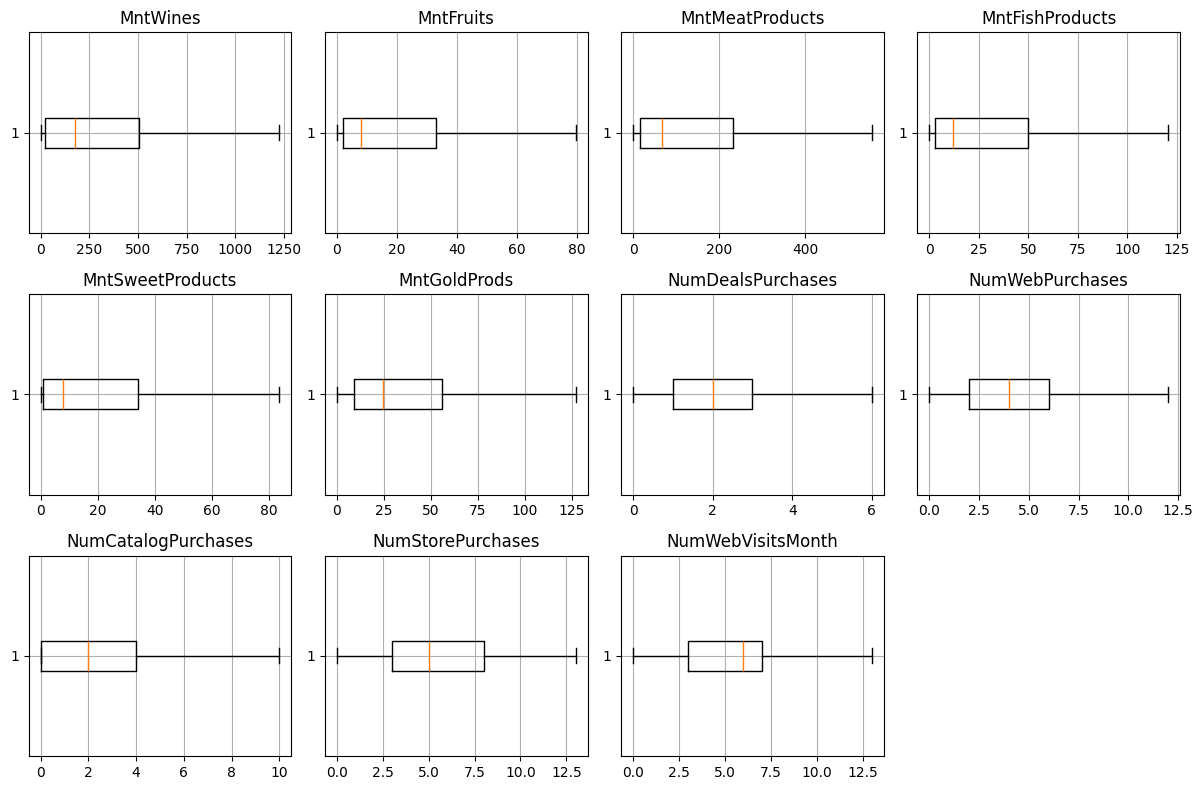

In [126]:
# List of columns
columns_to_visualize = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                        'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                        'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                        'NumWebVisitsMonth']

# Create boxplots for outlier detection
plt.figure(figsize=(12, 8))

# Loop through columns to create boxplots
for i, column in enumerate(columns_to_visualize, start=1):
    plt.subplot(3, 4, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(column)
    plt.grid(True)

plt.tight_layout()
plt.show()

## **Discriptive Statistics after handling outliers**

In [127]:
# Extracting relevant numerical columns
numerical_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
                  'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                  'NumWebVisitsMonth']

# Calculating statistics for numerical columns
numerical_stats = df[numerical_cols].agg(['mean', 'median', 'var', 'std']).transpose()

# Renaming index and formatting the table
numerical_stats.index.name = 'Numerical Variables'
numerical_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation']

# Displaying the summary table
numerical_stats

,Mean,Median,Variance,Standard Deviation
Numerical Variables,,,,
Year_Birth,1968.792563,1970.0,1.437682e+02,11.990340
Income,51630.926971,51381.5,4.244292e+08,20601.679542
Kidhome,0.444444,0.0,2.900543e-01,0.538567
Teenhome,0.507168,0.0,2.966765e-01,0.544680
Recency,49.111111,49.0,8.382700e+02,28.952893
MntWines,303.124328,176.0,1.097591e+05,331.299047
MntFruits,21.580645,8.0,7.256842e+02,26.938527
MntMeatProducts,150.501176,67.0,3.170695e+04,178.064465
MntFishProducts,32.215726,12.0,1.631996e+03,40.397975


## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

  

Probability of Response = 1 (success): 0.1496
Expected value (mean) for Response: 0.1496


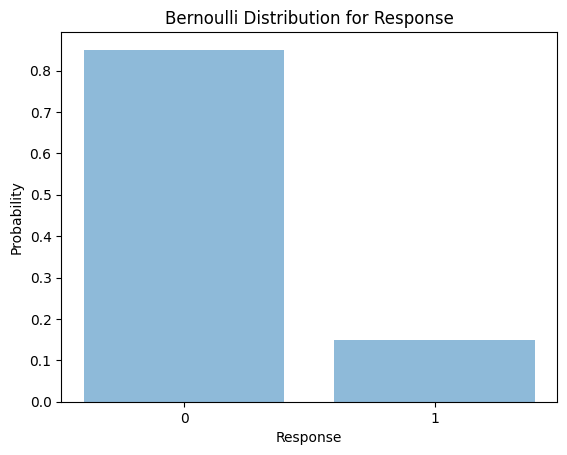

In [128]:
# Assuming 'Response' is a binary variable (0: No response, 1: Response)
# Calculate the probability of a response (success) based on the dataset
prob_response = df['Response'].mean()  # Probability of success (response)

# Probability Mass Function (PMF) for Bernoulli distribution (probability of success = prob_response)
prob_success = stats.bernoulli.pmf(1, prob_response)
print(f"Probability of Response = 1 (success): {prob_success:.4f}")

# Expected value (mean) for a Bernoulli distribution
expected_value = stats.bernoulli.mean(prob_response)
print(f"Expected value (mean) for Response: {expected_value:.4f}")

# Visualize Bernoulli distribution
x = [0, 1]  # Possible outcomes for a Bernoulli distribution
pmf_values = stats.bernoulli.pmf(x, prob_response)

plt.bar(x, pmf_values, align='center', alpha=0.5)
plt.xticks(x)
plt.xlabel('Response')
plt.ylabel('Probability')
plt.title('Bernoulli Distribution for Response')
plt.show()

Probability of Complain = 1 (success): 0.0094
Expected value (mean) for Complain: 0.0094


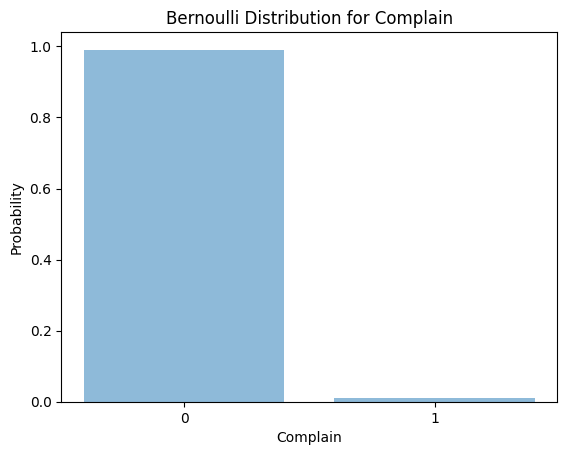

In [129]:
# Assuming 'Complain' is a binary variable (0: No complaint, 1: Complaint)
# Calculate the probability of a complaint (success) based on the dataset
prob_complain = df['Complain'].mean()  # Probability of success (complaint)

# Probability Mass Function (PMF) for Bernoulli distribution (probability of success = prob_complain)
prob_success = stats.bernoulli.pmf(1, prob_complain)
print(f"Probability of Complain = 1 (success): {prob_success:.4f}")

# Expected value (mean) for a Bernoulli distribution
expected_value = stats.bernoulli.mean(prob_complain)
print(f"Expected value (mean) for Complain: {expected_value:.4f}")

# Visualize Bernoulli distribution
x = [0, 1]  # Possible outcomes for a Bernoulli distribution
pmf_values = stats.bernoulli.pmf(x, prob_complain)

plt.bar(x, pmf_values, align='center', alpha=0.5)
plt.xticks(x)
plt.xlabel('Complain')
plt.ylabel('Probability')
plt.title('Bernoulli Distribution for Complain')
plt.show()

In [130]:
# List of continuous variables
continuous_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for column in continuous_columns:
    # Extracting data for the column (replace 'df' with your DataFrame)
    data = df[column].dropna()  # Remove missing values if any

    # Fit a Normal distribution using maximum likelihood estimation (MLE)
    mu, sigma = stats.norm.fit(data)

    # Calculate probabilities and expected value
    prob_100 = stats.norm.cdf(100, mu, sigma)  # Probability of value <= 100
    expected_value = stats.norm.mean(mu, sigma)  # Expected value (mean)

    # Display results for each column
    print(f"Variable: {column}")
    print(f"Estimated Mean (mu): {mu:.2f}")
    print(f"Estimated Standard Deviation (sigma): {sigma:.2f}")
    print(f"Probability of value <= 100: {prob_100:.4f}")
    print(f"Expected Value (mean): {expected_value:.2f}\n")

Variable: MntWines
Estimated Mean (mu): 303.12
Estimated Standard Deviation (sigma): 331.22
Probability of value <= 100: 0.2699
Expected Value (mean): 303.12

Variable: MntFruits
Estimated Mean (mu): 21.58
Estimated Standard Deviation (sigma): 26.93
Probability of value <= 100: 0.9982
Expected Value (mean): 21.58

Variable: MntMeatProducts
Estimated Mean (mu): 150.50
Estimated Standard Deviation (sigma): 178.02
Probability of value <= 100: 0.3883
Expected Value (mean): 150.50

Variable: MntFishProducts
Estimated Mean (mu): 32.22
Estimated Standard Deviation (sigma): 40.39
Probability of value <= 100: 0.9534
Expected Value (mean): 32.22

Variable: MntSweetProducts
Estimated Mean (mu): 22.29
Estimated Standard Deviation (sigma): 28.15
Probability of value <= 100: 0.9971
Expected Value (mean): 22.29

Variable: MntGoldProds
Estimated Mean (mu): 39.67
Estimated Standard Deviation (sigma): 40.06
Probability of value <= 100: 0.9340
Expected Value (mean): 39.67



## **Distribution for products columns**

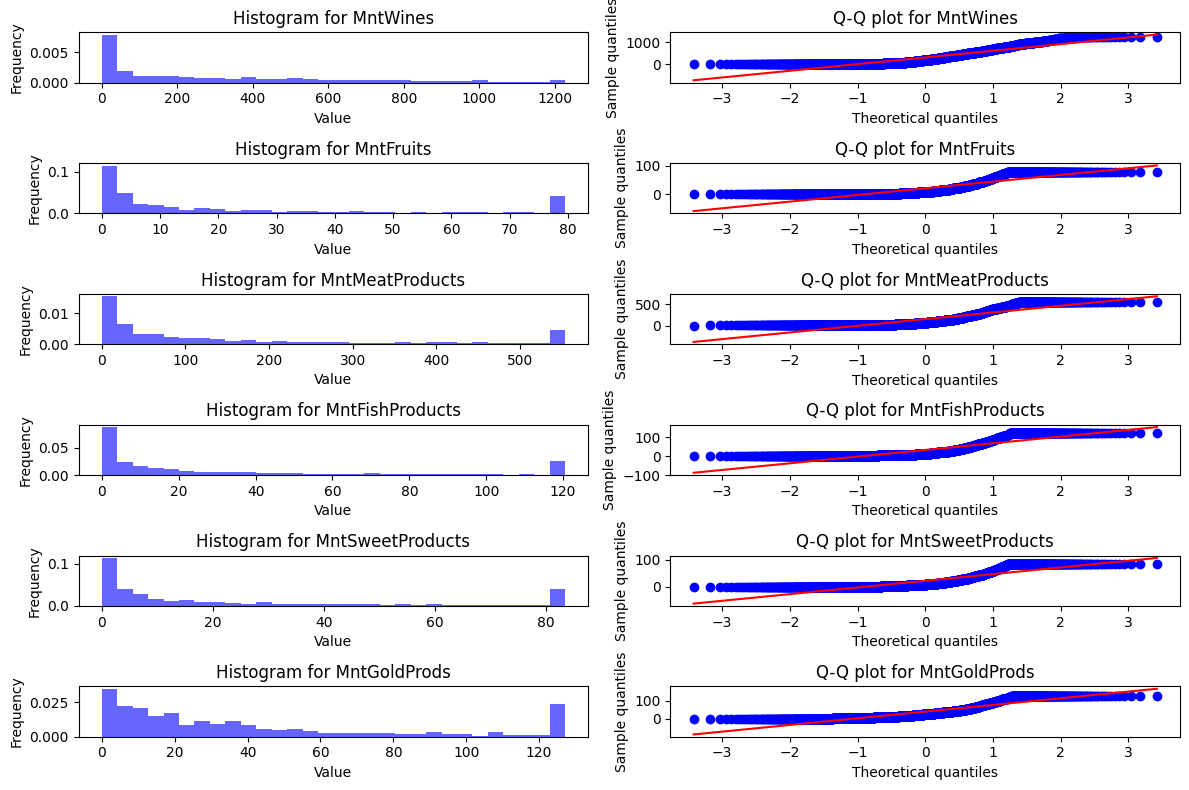

In [131]:
fig, axes = plt.subplots(nrows=len(continuous_columns), ncols=2, figsize=(12, 8))

for i, column in enumerate(continuous_columns):
    # Extracting data for the column (replace 'df' with your DataFrame)
    data = df[column].dropna()  # Remove missing values if any

    # Fit a Normal distribution using maximum likelihood estimation (MLE)
    mu, sigma = stats.norm.fit(data)

    # Create histogram
    axes[i, 0].hist(data, bins=30, density=True, alpha=0.6, color='blue')
    axes[i, 0].set_title(f'Histogram for {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Create Q-Q plot (quantile-quantile plot)
    stats.probplot(data, dist="norm", plot=axes[i, 1])
    axes[i, 1].get_lines()[1].set_color('red')  # Highlight the Normal distribution line
    axes[i, 1].set_title(f'Q-Q plot for {column}')
    axes[i, 1].set_xlabel('Theoretical quantiles')
    axes[i, 1].set_ylabel('Sample quantiles')

plt.tight_layout()
plt.show()

In [132]:
# List of count/frequency variables
count_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'NumDealsPurchases']

for column in count_columns:
    # Extracting data for the column (replace 'df' with your DataFrame)
    data = df[column].dropna()  # Remove missing values if any

    # Fit a Poisson distribution using maximum likelihood estimation (MLE)
    mu = data.mean()  # Using sample mean as parameter for Poisson
    fitted_poisson = stats.poisson(mu)

    # Calculate probabilities and expected value
    prob_5 = fitted_poisson.pmf(5)  # Probability of value = 5
    expected_value = fitted_poisson.mean()  # Expected value (mean)

    # Display results for each column
    print(f"Variable: {column}")
    print(f"Estimated Mean (mu) for Poisson: {mu:.2f}")
    print(f"Probability of value = 5: {prob_5:.4f}")
    print(f"Expected Value (mean): {expected_value:.2f}\n")

Variable: NumWebPurchases
Estimated Mean (mu) for Poisson: 4.07
Probability of value = 5: 0.1591
Expected Value (mean): 4.07

Variable: NumCatalogPurchases
Estimated Mean (mu) for Poisson: 2.62
Probability of value = 5: 0.0749
Expected Value (mean): 2.62

Variable: NumStorePurchases
Estimated Mean (mu) for Poisson: 5.81
Probability of value = 5: 0.1654
Expected Value (mean): 5.81

Variable: NumWebVisitsMonth
Estimated Mean (mu) for Poisson: 5.31
Probability of value = 5: 0.1738
Expected Value (mean): 5.31

Variable: NumDealsPurchases
Estimated Mean (mu) for Poisson: 2.22
Probability of value = 5: 0.0486
Expected Value (mean): 2.22



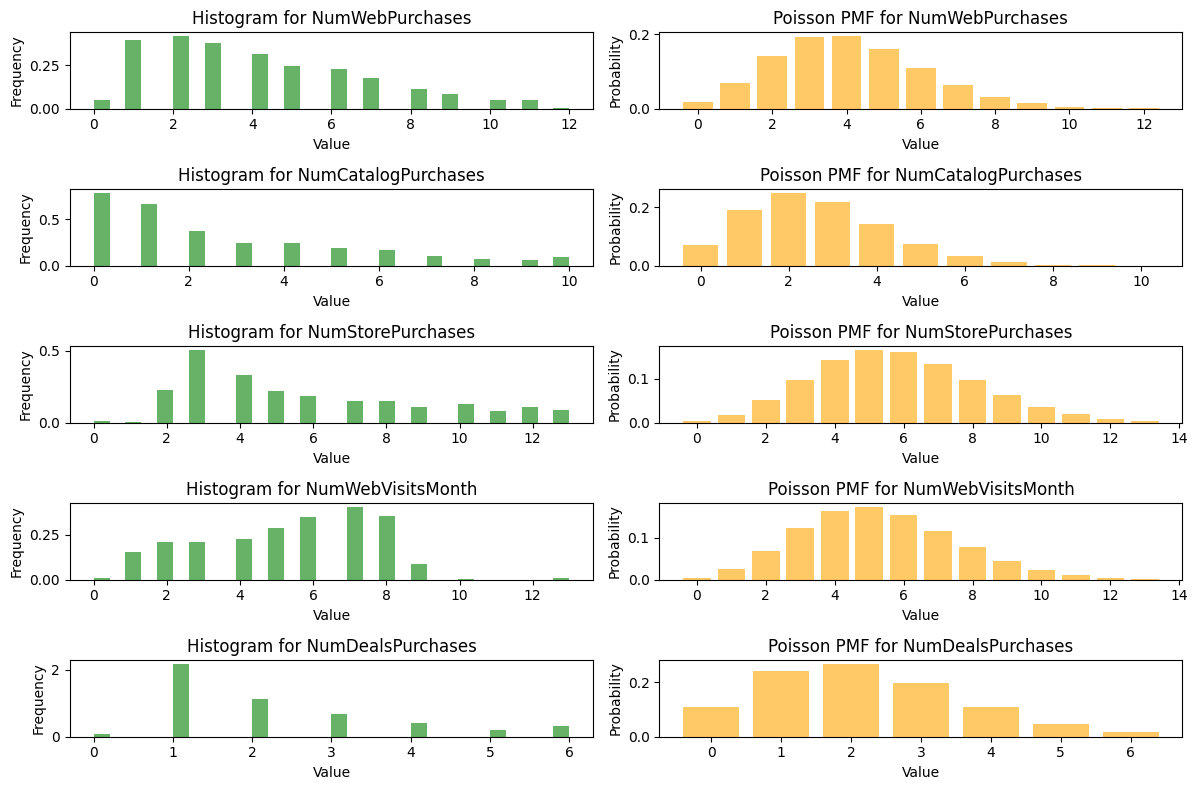

In [133]:
fig, axes = plt.subplots(nrows=len(count_columns), ncols=2, figsize=(12, 8))

for i, column in enumerate(count_columns):
    # Extracting data for the column (replace 'df' with your DataFrame)
    data = df[column].dropna()  # Remove missing values if any

    # Fit a Poisson distribution using maximum likelihood estimation (MLE)
    mu = data.mean()  # Using sample mean as parameter for Poisson
    fitted_poisson = stats.poisson(mu)

    # Create histogram
    axes[i, 0].hist(data, bins=30, density=True, alpha=0.6, color='green')
    axes[i, 0].set_title(f'Histogram for {column}')
    axes[i, 0].set_xlabel('Value')
    axes[i, 0].set_ylabel('Frequency')

    # Plot the probability mass function (PMF) of the fitted Poisson distribution
    x = range(0, int(max(data)) + 1)  # Ensure maximum value is converted to an integer
    pmf_values = fitted_poisson.pmf(x)
    axes[i, 1].bar(x, pmf_values, alpha=0.6, color='orange')
    axes[i, 1].set_title(f'Poisson PMF for {column}')
    axes[i, 1].set_xlabel('Value')
    axes[i, 1].set_ylabel('Probability')

plt.tight_layout()
plt.show()

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

  

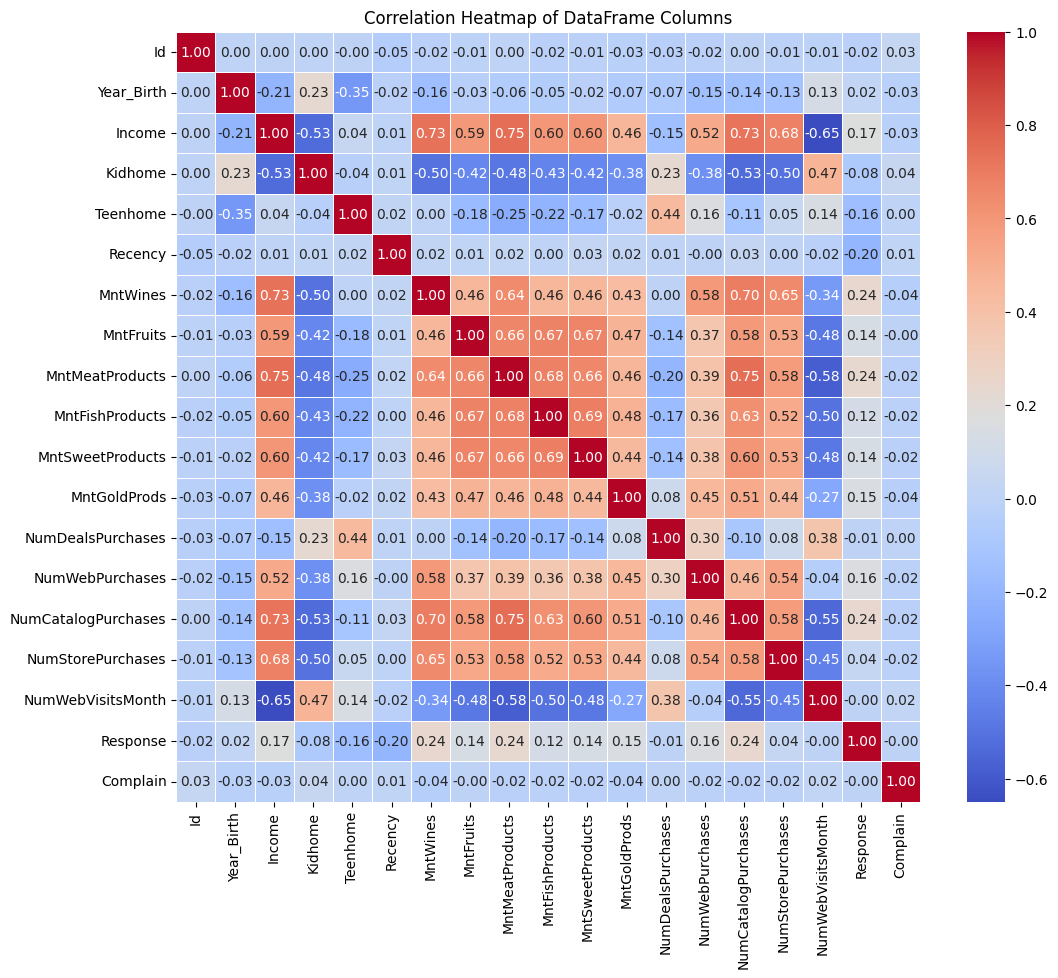

In [134]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns from the DataFrame
numeric_df = df.select_dtypes(include=['number'])

# Creating the correlation matrix
corr_matrix = numeric_df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of DataFrame Columns')
plt.show()


## **Key insights regarding variables:**

### **1. Income and Spending Patterns:**

There seems to be a positive correlation between 'Income' and spending on 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases'and
       'NumStorePurchases'. Higher-income customers tend to spend more on these categories.

### **2. 'Kidhome' and 'NumWebVisitsMonth' (correlation = 0.47):**

* A correlation of 0.47 indicates a moderate positive correlation between the    number of children at home ('Kidhome') and the number of web visits per month ('NumWebVisitsMonth').
* This suggests that customers with more children at home are moderately more likely to make a higher number of web visits each month. The positive correlation implies that as the number of children at home increases, the number of web visits tends to increase as well.

### **3. 'Teenhome' and 'NumDealsPurchases':**

A correlation of 0.44 between 'Teenhome' and 'NumDealsPurchases' indicates a moderate positive association, suggesting that customers with more teenagers at home tend to have a higher number of deals purchases.

### **4. 'NumDealsPurchases' and 'NumWebPurchases' (correlation = 0.30):**

* A correlation of 0.30 indicates a positive, but relatively weak, correlation between the number of deals purchases ('NumDealsPurchases') and the number of web purchases ('NumWebPurchases').
* This suggests that customers who engage in more deals purchases are somewhat more likely to make more web-based purchases. However, the correlation is not very strong, and other factors may also influence the relationship.

### **'NumDealsPurchases' and 'NumWebVisitsMonth' (correlation = 0.38):**

* A correlation of 0.38 indicates a positive, moderate correlation between the number of deals purchases ('NumDealsPurchases') and the number of web visits per month ('NumWebVisitsMonth').
* This suggests that customers who make a higher number of deals purchases are moderately more likely to have a higher number of web visits each month. The positive correlation implies that as the number of deals purchases increases, the number of web visits tends to increase as well.

### **5. 'NumWebPurchases' and 'Income' (correlation = 0.52):**

* A correlation of 0.52 indicates a moderate positive correlation between the number of web purchases ('NumWebPurchases') and the income of customers ('Income').
* This suggests that customers with higher incomes tend to make a higher number of web-based purchases. The positive correlation implies that as income increases, the number of web purchases also tends to increase.

### **'NumWebPurchases' and 'MntWines' (correlation = 0.58):**

* A correlation of 0.58 indicates a moderate to strong positive correlation between the number of web purchases ('NumWebPurchases') and spending on wines ('MntWines').
* This implies that customers who make a higher number of web purchases are also likely to spend more on wines, fruits, meat, fish products, sweetproducts, gold products. The positive correlation suggests a concurrent increase in both variables.
* Peolple who purchase through web also tend to take more deals on purchases.  

### **'NumWebPurchases' and 'NumCatalogPurchases' (correlation = 0.46):**

* A correlation of 0.46 indicates a moderate positive correlation between the number of web purchases ('NumWebPurchases') and the number of catalog purchases ('NumCatalogPurchases').
* This suggests that customers who make more web purchases also tend to make a moderately higher number of catalog purchases. The positive correlation implies a tendency for these two variables to increase together.

### **'NumWebPurchases' and 'NumStorePurchases' (correlation = 0.54):**

* A correlation of 0.54 indicates a moderate positive correlation between the number of web purchases ('NumWebPurchases') and the number of store purchases ('NumStorePurchases').
* This suggests that customers who make more web purchases are also likely to make a moderately higher number of in-store purchases. The positive correlation implies a concurrent increase in both variables.

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

Actionable recommendations based on customer behavior analysis. Here are some general recommendations that might arise from the analysis of the columns:

### 1. **Targeted Marketing Campaigns:**
   - Identify high-value customer segments and design targeted marketing campaigns to cater to their specific needs and preferences.

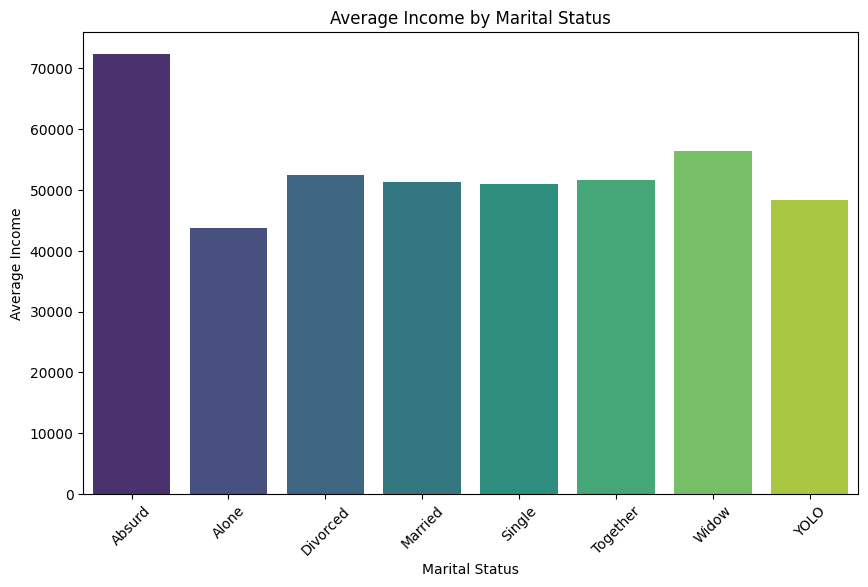

In [135]:
# Calculate average income for each marital status category
avg_income_by_marital_status = df.groupby('Marital_Status')['Income'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Marital_Status',
    y='Income',
    hue='Marital_Status',  # Assign x to hue to avoid the warning
    data=avg_income_by_marital_status,
    palette='viridis',
    dodge=False,  # Avoid separating bars by hue
    legend=False  # Suppress the legend
)
plt.title('Average Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Income')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.show()


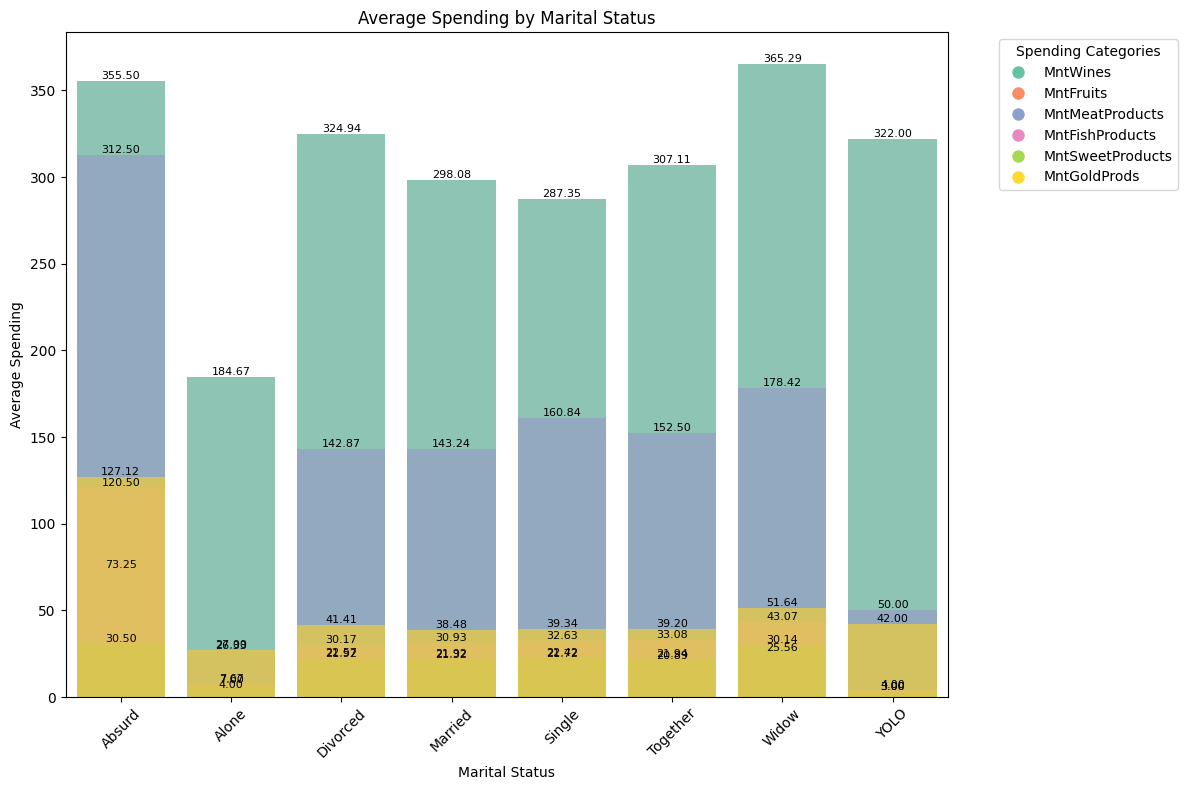

In [136]:
# Selecting only numerical columns for spending categories
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds']

# Calculating average spending for each marital status category
avg_spending_by_marital = df.groupby('Marital_Status')[spending_columns].mean().reset_index()

# Define colors for each spending category using a different palette
colors = sns.color_palette('Set2', n_colors=len(spending_columns))

plt.figure(figsize=(12, 8))
for i, col in enumerate(spending_columns):
    sns.barplot(x='Marital_Status', y=col, data=avg_spending_by_marital, alpha=0.8, label=col, color=colors[i])

    # Add labels for each segment
    for j, val in enumerate(avg_spending_by_marital[col]):
        plt.text(j, val, f'{val:.2f}', ha='center', va='bottom', fontsize=8)

# Create custom legend with colors
legend_labels = [
    plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=colors[i], markersize=10)
    for i, label in enumerate(spending_columns)
]

plt.title('Average Spending by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.legend(handles=legend_labels, title='Spending Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### 2. **Promotions and Deals:**
   - Analyze the behavior of customers who respond well to deals and promotions ('NumDealsPurchases').
   - Design targeted promotions for this segment to encourage more purchases.

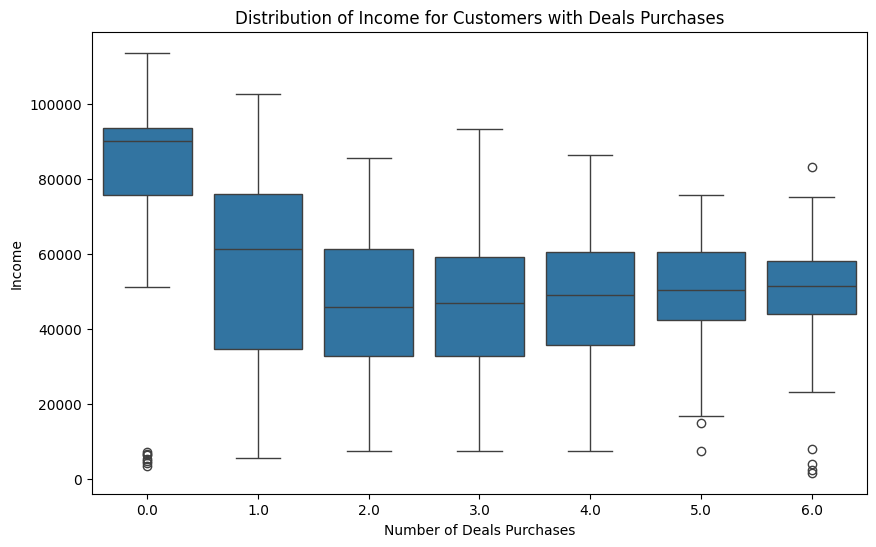

In [137]:
selected_columns = ['Income', 'NumDealsPurchases']

# Select relevant columns
df_selected = df[selected_columns]

plt.figure(figsize=(10, 6))
sns.boxplot(x='NumDealsPurchases', y='Income', data=df_selected)
plt.title('Distribution of Income for Customers with Deals Purchases')
plt.xlabel('Number of Deals Purchases')
plt.ylabel('Income')
plt.show()


This box plot provides a more detailed view of the income distribution within different segments of customers who made varying numbers of deals purchases.

These visualizations can help understand the behavior of customers responding well to deals and promotions, allowing to design targeted promotions and marketing strategies accordingly. Adjust the selected columns and explore additional variables based on your specific business context and goals.


### 3. **Website Optimization:**
   - Focus on improving the online shopping experience, as customers making more web purchases ('NumWebPurchases') and having higher web visits ('NumWebVisitsMonth') represent an engaged online audience.
   - Optimize the website for better user experience and ensure a seamless checkout process.

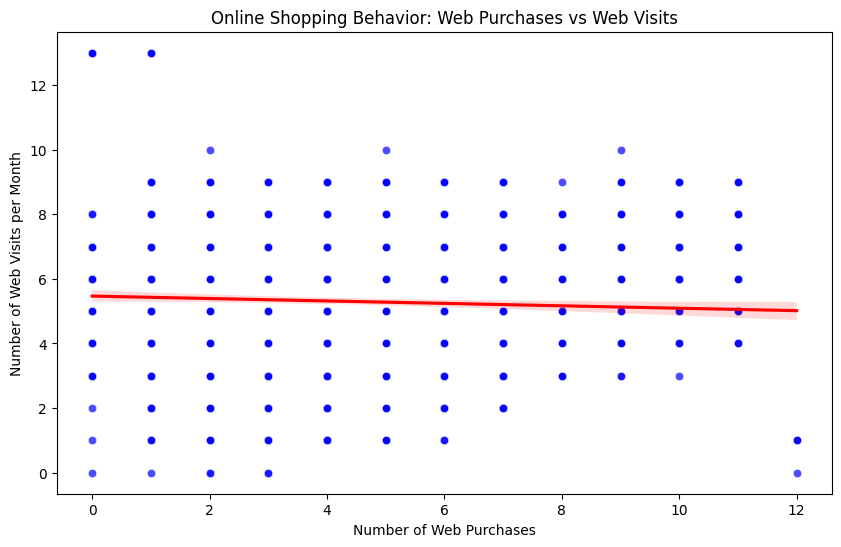

In [138]:
selected_columns = ['NumWebPurchases', 'NumWebVisitsMonth']

# Select relevant columns
df_selected = df[selected_columns]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='NumWebPurchases', y='NumWebVisitsMonth', data=df_selected, alpha=0.7, color='blue')
sns.regplot(x='NumWebPurchases', y='NumWebVisitsMonth', data=df_selected, scatter=False, color='red')
plt.title('Online Shopping Behavior: Web Purchases vs Web Visits')
plt.xlabel('Number of Web Purchases')
plt.ylabel('Number of Web Visits per Month')
plt.show()

Key insights from a downward-sloping regression line:

1. **Inverse Relationship:** Customers who engage in more web visits per month are making fewer web purchases. This suggests that a higher number of web visits might not necessarily translate into a higher number of transactions.

2. **Potential Issues:** There may be potential issues or barriers on the website that hinder customers from completing transactions despite frequent visits. It could be related to the user interface, checkout process, or other aspects of the online shopping experience.

In summary, a downward-sloping regression line suggests that there might be room for improvement in converting web visits into actual purchases. Analyzing the reasons behind this inverse relationship can guide website optimization efforts to create a more effective and conversion-friendly online shopping experience.

### 4. **Segment-Specific Communication:**
   - Craft communication strategies based on customer segments. For example, communicate differently with families having 'Kidhome' and 'Teenhome' compared to those without children.

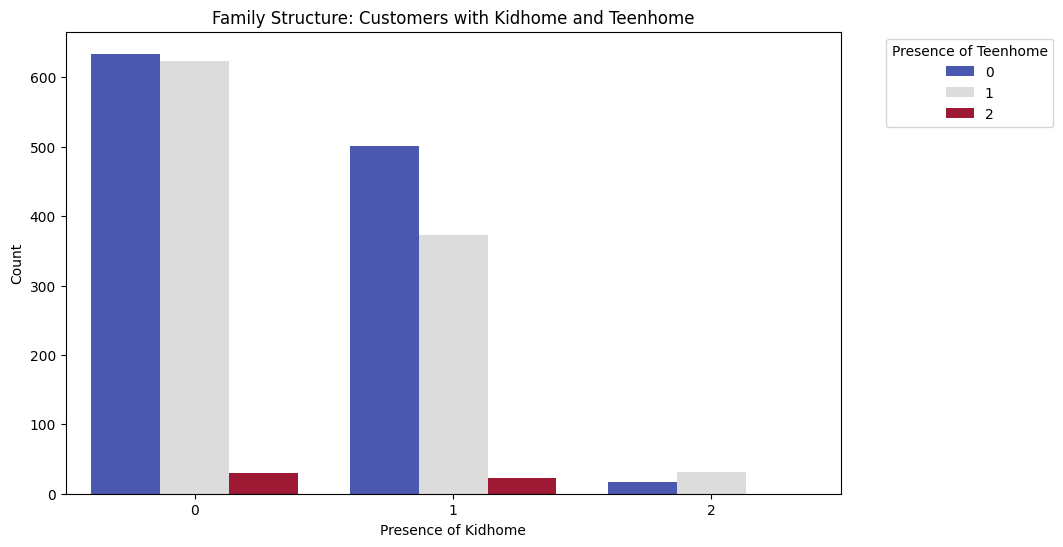

In [139]:
selected_columns = ['Kidhome', 'Teenhome']

# Select relevant columns
df_selected = df[selected_columns]

# Count plot for family structure
plt.figure(figsize=(10, 6))
sns.countplot(x='Kidhome', data=df_selected, hue='Teenhome', palette='coolwarm')
plt.title('Family Structure: Customers with Kidhome and Teenhome')
plt.xlabel('Presence of Kidhome')
plt.ylabel('Count')
plt.legend(title='Presence of Teenhome', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Insights from the visualization:

1. **Family Structure Distribution:**
   - The count plot displays the distribution of customers based on the presence of 'Kidhome' and 'Teenhome'.
   - Different colors represent the presence or absence of 'Teenhome' within each category of 'Kidhome'.

2. **Communication Strategy Insights:**
   - If there are distinct segments with families having both 'Kidhome' and 'Teenhome', it indicates a unique customer segment with specific communication needs.
   - By understanding the composition of your customer base in terms of family structure, you can tailor communication strategies to address the preferences and needs of different segments.

3. **Targeted Messaging:**
   - Consider crafting targeted messages for families with both 'Kidhome' and 'Teenhome' that resonate with their specific interests and challenges.
   - Communication strategies for customers without children may focus on different aspects that align with their lifestyle and preferences.

4. **Personalized Offers:**
   - Use this information to personalize offers or promotions that cater to the needs of specific family segments, enhancing the effectiveness of your marketing campaigns.


### **5. In-Store Experience Enhancement:**
   - Consider enhancing the in-store experience for customers who make a significant number of in-store purchases ('NumStorePurchases').
   - Implement loyalty programs or exclusive in-store promotions to encourage repeat visits.

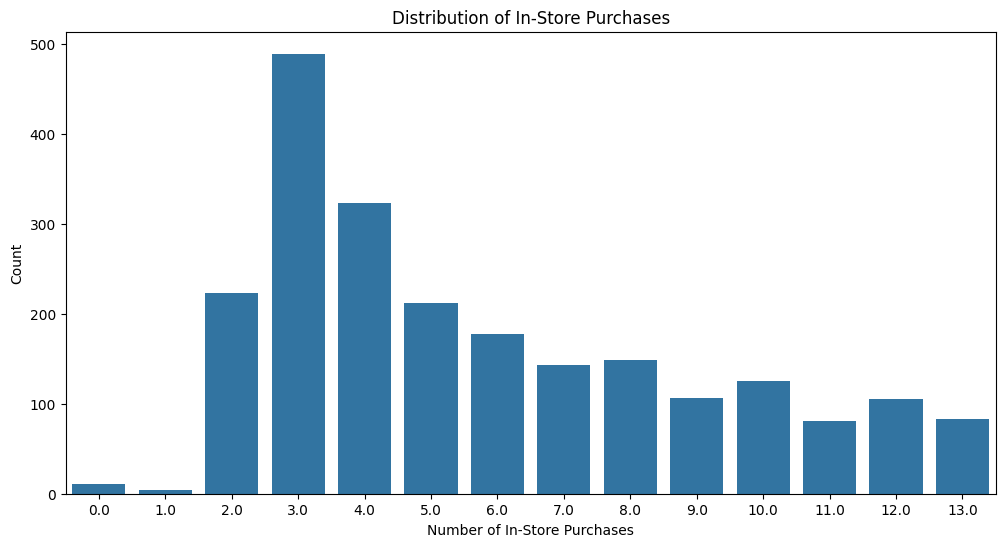

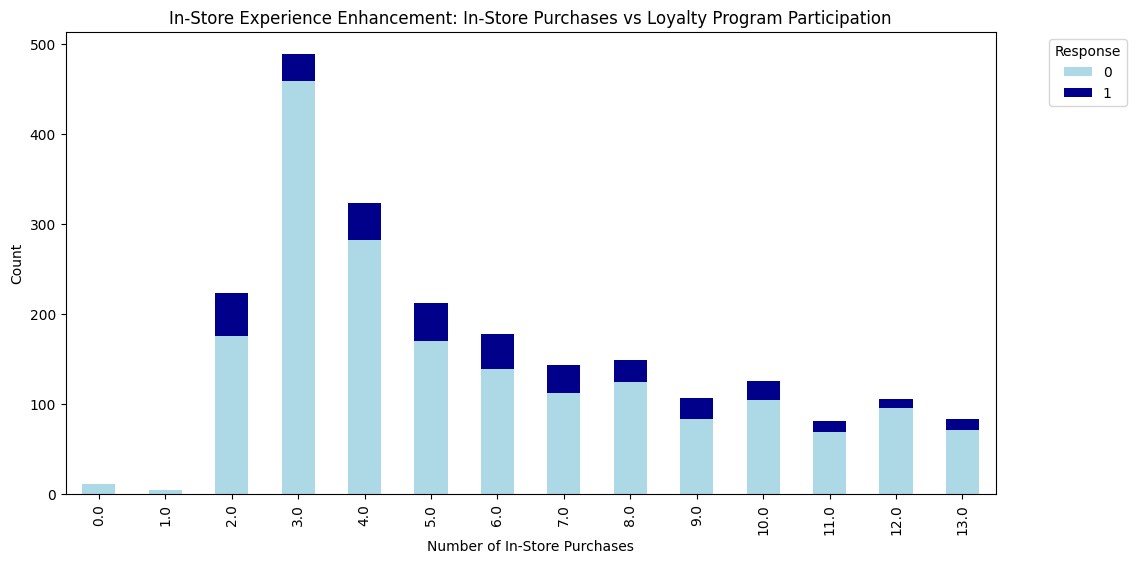

In [140]:
selected_columns = ['NumStorePurchases', 'Response']

# Selecting relevant columns
df_selected = df[selected_columns]

# Count plot for in-store purchases
plt.figure(figsize=(12, 6))
sns.countplot(x='NumStorePurchases', data=df_selected)
plt.title('Distribution of In-Store Purchases')
plt.xlabel('Number of In-Store Purchases')
plt.ylabel('Count')
plt.show()

# Bar plot for participation in loyalty programs based on in-store purchases
loyalty_counts = df_selected.groupby('NumStorePurchases')['Response'].value_counts().unstack()
loyalty_counts.plot(kind='bar', stacked=True, color=['lightblue', 'darkblue'], figsize=(12, 6))
plt.title('In-Store Experience Enhancement: In-Store Purchases vs Loyalty Program Participation')
plt.xlabel('Number of In-Store Purchases')
plt.ylabel('Count')
plt.legend(title='Response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()



**Insights from the visualizations:**

1. **In-Store Purchases Distribution:**
   - The count plot displays the distribution of customers based on the number of in-store purchases ('NumStorePurchases').
   - Identify the segments of customers who make a significant number of in-store purchases.

2. **Effectiveness of Loyalty Programs:**
   - The bar plot compares the participation in loyalty programs ('Response') for different levels of in-store purchases.
   - If customers with a higher number of in-store purchases show a higher participation rate in loyalty programs, it indicates the effectiveness of these programs in retaining these customers.

3. **Opportunities for Enhancement:**
   - Focus on enhancing the in-store experience for customers who make fewer in-store purchases, as indicated by the distribution.
   - Consider implementing exclusive in-store promotions, personalized offers, or loyalty programs to encourage repeat visits and purchases.

4. **Tailored In-Store Strategies:**
   - Tailor in-store strategies based on the insights gained from the distribution of in-store purchases. Consider factors such as product placement, customer service, and promotional activities.

These visualizations provide insights into the distribution of in-store purchases and the effectiveness of loyalty programs, guiding efforts to enhance the in-store experience for different customer segments.

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍